---
## Part 1: Jupyter Tips


### Viewing Documentation

To output the documentation for a function, use the `help` function.

In [1]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



You can also use Jupyter to view function documentation inside your notebook. The function must already be defined in the kernel for this to work.

Below, click your mouse anywhere on the `print` block below and use `Shift` + `Tab` to view the function's documentation. 

In [2]:
print('Welcome to ECE 4710J.')

Welcome to ECE 4710J.


### Importing Libraries and Magic Commands

In the course, we will be using common Python libraries to help us process data. By convention, we import all libraries at the very top of the notebook. There are also a set of standard aliases that are used to shorten the library names. Below are some of the libraries that you may encounter throughout the course, along with their respective aliases.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline


`%matplotlib inline` is a [Jupyter magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) that configures the notebook so that Matplotlib displays any plots that you draw directly in the notebook rather than to a file, allowing you to view the plots upon executing your code. (Note: In practice, this is no longer necessary, but we're showing it to you now anyway.)

Another useful magic command is `%%time`, which times the execution of that cell. You can use this by writing it as the first line of a cell. (Note that `%%` is used for *cell magic commands* that apply to the entire cell, whereas `%` is used for *line magic commands* that only apply to a single line.)

In [5]:
%%time

lst = []
for i in range(100):
    lst.append(i)

CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 20 µs


---
## Part 2: Prerequisites

It's time to answer some review questions. Each question has a response cell directly below it. Most response cells are followed by a test cell that runs automated tests to check your work. Please don't delete questions, response cells, or test cells. You won't get credit for your work if you do.

If you have extra content in a response cell, such as an example call to a function you're implementing, that's fine. Also, feel free to add cells between the question cells and test cells (or the next cell, for questions without test cases). Any extra cells you add will be considered part of your submission. Finally, when you finish an assignment, make sure to "restart and run all cells" to ensure everything works properly. 

Note that for labs, ontime submissions that pass all the test cases will receive full credit. However for homeworks, test cells don't always confirm that your response is correct. They are meant to give you some useful feedback, but it's your responsibility to ensure your response answers the question correctly. There may be other tests that we run when scoring your notebooks. We **strongly recommend** that you check your solutions yourself rather than just relying on the test cells.

### Python
 If any of the following exercises are challenging (or if you would like to refresh your Python knowledge), please review one or more of the following materials.

- **[Python Tutorial](https://docs.python.org/3.8/tutorial/)**: Introduction to Python from the creators of Python.
- **[Composing Programs Chapter 1](http://composingprograms.com/pages/11-getting-started.html)**: This is more of a introduction to programming with Python.
- **[Advanced Crash Course](http://cs231n.github.io/python-numpy-tutorial/)**: A fast crash course which assumes some programming background.

### NumPy

NumPy is the numerical computing module, which is a prerequisite for this course. Here's a quick recap of NumPy. For more review, read the following materials.

- **[NumPy Quick Start Tutorial](https://numpy.org/doc/stable/user/quickstart.html)**
- **[Stanford CS231n NumPy Tutorial](http://cs231n.github.io/python-numpy-tutorial/#numpy)**

### Question 1

The core of NumPy is the array. Like Python lists, arrays store data; however, they store data in a more efficient manner. In many cases, this allows for faster computation and data manipulation.

we use `np.array` to create an array. It takes a sequence, such as a list or range. 

Below, create an array `arr` containing the values 1, 2, 3, 4, and 5 (in that order).

<!--
BEGIN QUESTION
name: q1
-->

In [6]:
arr = np.array([1,2,3,4,5])

In addition to values in the array, we can access attributes such as shape and data type. A full list of attributes can be found [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/arrays.ndarray.html#array-attributes).

In [7]:
arr[3]

4

In [8]:
arr[2:4]

array([3, 4])

In [9]:
arr.shape

(5,)

In [10]:
arr.dtype

dtype('int64')

Arrays, unlike Python lists, cannot store items of different data types.

In [11]:
# A regular Python list can store items of different data types
[1, '3']

[1, '3']

In [13]:
# Arrays will convert everything to the same data type
np.array([1, '3'])

array(['1', '3'], dtype='<U21')

In [14]:
# Another example of array type conversion
np.array([5, 8.3])

array([5. , 8.3])

Arrays are also useful in performing *vectorized operations*. Given two or more arrays of equal length, arithmetic will perform element-wise computations across the arrays. 

For example, observe the following:

In [15]:
# Python list addition will concatenate the two lists
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [16]:
# NumPy array addition will add them element-wise
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

### Question 2

#### Question 2a

Write a function `summation` that evaluates the following summation for $n \geq 1$:

$$\sum_{i=1}^{n} i^3 + 3 i^2$$

**Note**: You should not use `for` loops in your solution. Check the [NumPy documentation](https://numpy.org/doc/1.18/reference/index.html). If you're stuck, try a search engine! Searching the web for examples of how to use modules is very common in data science.

<!--
BEGIN QUESTION
name: q2a
-->

In [17]:
def summation(n):
    """Compute the summation i^3 + 3 * i^2 for 1 <= i <= n."""
    
    i = np.arange(1,n+1)
    return(np.sum(i**3+3*i**2))

In [19]:
summation(2)

24

#### Question 2b

Write a function `elementwise_array_sum` that computes the square of each value in `list_1`, the cube of each value in `list_2`, then returns a list containing the element-wise sum of these results. Assume that `list_1` and `list_2` have the same number of elements.

The input parameters will both be **python lists**, so you may need to convert the lists into arrays before performing your operations. The output should be a **numpy array.**



<!--
BEGIN QUESTION
name: q2b
-->

In [21]:
def elementwise_array_sum(list_1, list_2):
    """Compute x^2 + y^3 for each x, y in list_1, list_2. 
    
    Assume list_1 and list_2 have the same length.
    
    Return a NumPy array.
    """
    assert len(list_1) == len(list_2), "both args must have the same number of elements"
    return np.array(list_1)**2+np.array(list_2)**3

You might have been told that Python is slow, but array arithmetic is carried out very fast, even for large arrays. Below is an implementation of the above code that does not use NumPy arrays.

In [22]:
def elementwise_list_sum(list_1, list_2):
    """Compute x^2 + y^3 for each x, y in list_1, list_2. 
    
    Assume list_1 and list_2 have the same length.
    """

    return [x ** 2 + y ** 3 for x, y in zip(list_1, list_2)]

For ten numbers, `elementwise_list_sum` and `elementwise_array_sum` both take a similar amount of time.

In [26]:
sample_list_1 = list(range(10))
sample_array_1 = np.arange(10)

In [24]:
%%time
elementwise_list_sum(sample_list_1, sample_list_1)

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 13.1 µs


[0, 2, 12, 36, 80, 150, 252, 392, 576, 810]

In [25]:
%%time
elementwise_array_sum(sample_array_1, sample_array_1)

CPU times: user 41 µs, sys: 9 µs, total: 50 µs
Wall time: 54.1 µs


array([  0,   2,  12,  36,  80, 150, 252, 392, 576, 810])

The time difference seems negligible for a list/array of size 10; depending on your setup, you may even observe that `elementwise_list_sum` executes faster than `elementwise_array_sum`! However, we will commonly be working with much larger datasets:

In [27]:
sample_list_2 = list(range(100000))
sample_array_2 = np.arange(100000)

In [30]:
%%time
elementwise_list_sum(sample_list_2, sample_list_2)
; # The semicolon hides the output

CPU times: user 74.6 ms, sys: 6.21 ms, total: 80.8 ms
Wall time: 80.1 ms


'# The semicolon hides the output'

In [31]:
%%time
elementwise_array_sum(sample_array_2, sample_array_2)
;

CPU times: user 2.02 ms, sys: 2.55 ms, total: 4.57 ms
Wall time: 6.32 ms


''

With the larger dataset, we see that using NumPy results in code that executes over 50 times faster! Throughout this course (and in the real world), you will find that writing efficient code will be important; arrays and vectorized operations are the most common way of making Python programs run quickly.

#### Question 2c
Recall the formula for population variance below:

$$\sigma^2 = \frac{\sum_{i=1}^N (x_i - \mu)^2}{N}$$

Complete the functions below to compute the population variance of `population`, an array of numbers. For this question, **do not use built in NumPy functions, such as `np.var`.** Again, avoid using `for` loops!

<!--
BEGIN QUESTION
name: q2c
points: 1
-->

In [32]:
def mean(population):
    """
    Returns the mean of population (mu)
    
    Keyword arguments:
    population -- a numpy array of numbers
    """
    # Calculate the mean of a population
    return sum(population)/len(population)

def variance(population):
    """
    Returns the variance of population (sigma squared)
    
    Keyword arguments:
    population -- a numpy array of numbers
    """
    # Calculate the variance of a population
    return sum((population-mean(population))**2)/len(population)

#### Question 2d

Given the array `random_arr`, assign `valid_values` to an array containing all values $x$ such that $2x^4 > 1$.

**Note**: You should not use `for` loops in your solution. Instead, look at `numpy`'s documentation on [Boolean Indexing](https://numpy.org/devdocs/reference/arrays.indexing.html). 

<!--
BEGIN QUESTION
name: q2d
points: 1
-->

In [43]:
np.random.seed(42)
random_arr = np.random.rand(60)
#print(2*random_arr**4)
valid_values = random_arr[2*random_arr**4>1]
print(valid_values)

[0.95071431 0.86617615 0.96990985 0.94888554 0.96563203 0.9093204
 0.96958463 0.93949894 0.89482735 0.92187424]


---
## Part 3: Plotting
Here we explore plotting using `matplotlib` and `numpy`.

### Question 3 ###


Consider the function $f(x) = x^2$ for $-\infty < x < \infty$.

#### Question 3a ####
Find the equation of the tangent line to $f$ at $x = 0$.

Use LaTeX to type your solution, such that it looks like the serif font used to display the math expressions in the sentences above.

**HINT**: Double-click this cell to see the raw Markdown syntax.


$f(x) = 0$ for $-\infty < x < \infty$.

#### Question 3b ####
Find the equation of the tangent line to $f$ at $x = 8$. Please use LaTeX to type your solution.

<!--
BEGIN QUESTION
name: q3b
-->

$f(x) = 16x-64$ for $-\infty < x < \infty$.

#### Question 3c #### 

Write code to plot the function $f$, the tangent line at $x=8$, and the tangent line at $x=0$. 

Set the range of the x-axis to (-15, 15) and the range of the y-axis to (-100, 300) and the figure size to (4,4).

Your resulting plot should look like this:

<img src="derivative.png" align="center"/>

You should use the `plt.plot` function to plot lines. You may find the following functions useful:

- [`plt.plot(..)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [`plt.figure(figsize=..)`](https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib)
- [`plt.ylim(..)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html)
- [`plt.axhline(..)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hlines.html)

<!--
BEGIN QUESTION
name: q3c
-->

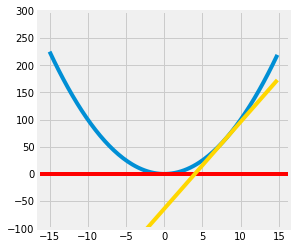

In [42]:
def f(x):
    return x**2
    
def df(x):
    return 2*x

def plot(f, df): 
    plt.figure(figsize=(4,4))
    plt.ylim(-100,300)
    x = np.arange(-15,15,0.2)
    plt.plot(x,f(x))
    plt.axhline(0,color='red')
    plt.plot(x,df(8)*x+f(8)-8*df(8),color='gold')
    

plot(f, df)

### Question 4 ##

Data science is a rapidly expanding field and no degree program can hope to teach you everything that will be helpful to you as a data scientist. So it's important that you become familiar with looking up documentation and learning how to read it. 

Below is a section of code that plots a three-dimensional "wireframe" plot. You'll see what that means when you draw it. Replace each `# Your answer here` with a description of what the line above does, what the arguments being passed in are, and how the arguments are used in the function. For example,

```
np.arange(2, 5, 0.2)
# This returns an array of numbers from 2 to 5 with an interval size of 0.2
```

**Hint:** The `Shift` + `Tab` tip from earlier in the notebook may help here. Remember that objects must be defined in order for the documentation shortcut to work; for example, all of the documentation will show for method calls from `np` since we've already executed `import numpy as np`. However, since `z` is not yet defined in the kernel, `z.reshape(x.shape)` will not show documentation until you run the line `z = np.cos(squared)`.

<!--
BEGIN QUESTION
name: q4
-->

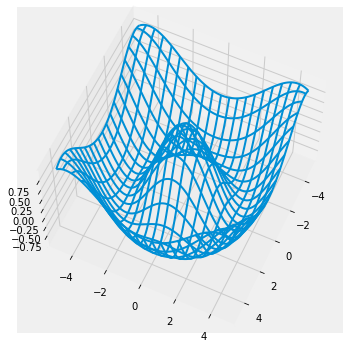

In [37]:
from mpl_toolkits.mplot3d import axes3d

u = np.linspace(1.5 * np.pi, -1.5 * np.pi, 100)
# Your answer here
[x, y] = np.meshgrid(u, u)
# Your answer here
squared = np.sqrt(x.flatten() ** 2 + y.flatten() ** 2)
z = np.cos(squared)
# Your answer here
z = z.reshape(x.shape)
# Your answer here

fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection = '3d')
# Your answer here
ax.plot_wireframe(x, y, z, rstride = 5, cstride = 5, lw = 2)
# Your answer here
ax.view_init(elev = 60, azim = 25)
# Your answer here
plt.savefig("figure1.png")
# Your answer here